<a href="https://colab.research.google.com/github/aditii0077/DS-experiments/blob/main/47_Aditi_Kalbhor_DS_exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

In [7]:
df = pd.read_csv('student_info.csv')
df


,Student ID,Name,Age,Grade
0,101,Alice,20,A
1,102,Bob,21,B
2,103,Charlie,19,A
3,104,David,22,C
4,105,Eve,20,B


In [4]:
#mean of data

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])
print(df['Age'])

0    20.0
1    21.0
2    19.0
3    22.0
4    20.0
Name: Age, dtype: float64


In [9]:
#median of data

In [10]:
imputer = SimpleImputer(strategy='median')
df['Age']=imputer.fit_transform(df[['Age']])
print(df['Age'])

0    20.0
1    21.0
2    19.0
3    22.0
4    20.0
Name: Age, dtype: float64


In [12]:
#Label Encoding: Convert categorical labels into numerical integers

In [13]:
label_encoder = LabelEncoder()
df['Age'] = label_encoder.fit_transform(df['Age'])
print(df['Age'])

0    1
1    2
2    0
3    3
4    1
Name: Age, dtype: int64


In [14]:
#One-Hot Encoding: Create binary columns for each category

In [15]:
ohe = OneHotEncoder()
encoded = ohe.fit_transform(df[['Age']])
print(df['Age'])

0    1
1    2
2    0
3    3
4    1
Name: Age, dtype: int64


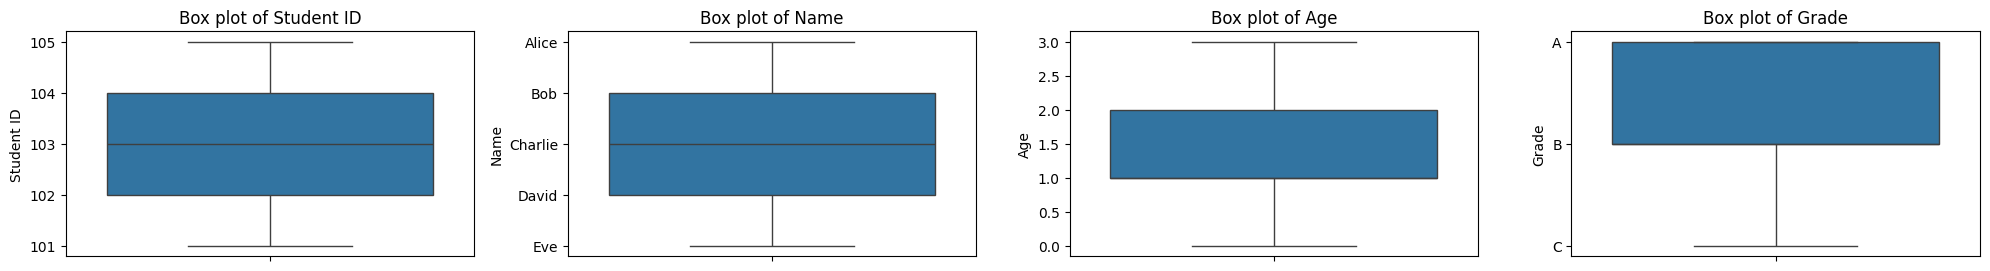

In [16]:
features = df.columns.tolist()
# Plot box plots for each feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(data=df[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()


In [17]:
#removing outliers

In [18]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
df


,Student ID,Name,Age,Grade
0,101,Alice,1,A
1,102,Bob,2,B
2,103,Charlie,0,A
3,104,David,3,C
4,105,Eve,1,B


In [19]:
#checking if outliers are removed

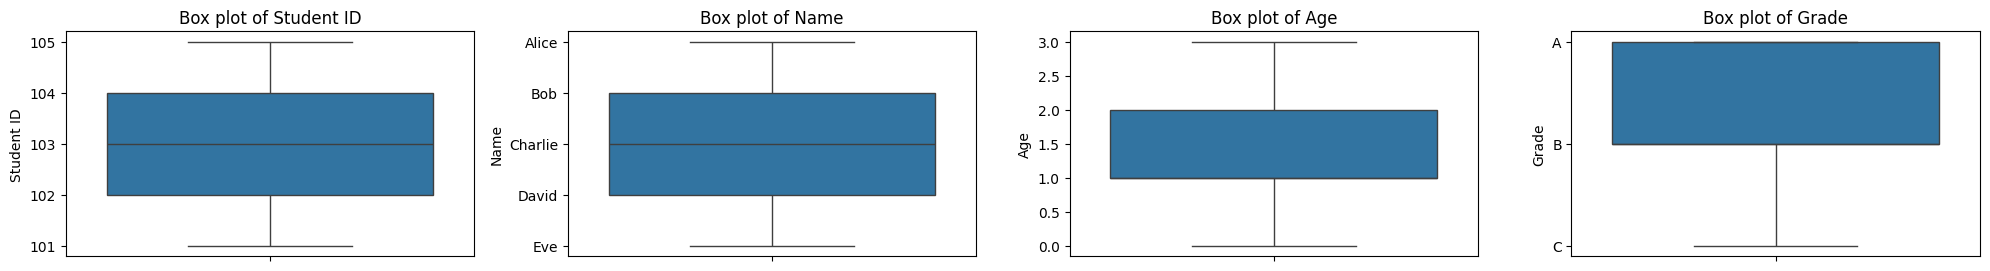

In [20]:
features = df.columns.tolist()
# Plot box plots for each feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(data=df[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()